In [274]:
import numpy as np
import sys
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import pandas as pd
import GPy
import math
import matplotlib as mpl
import mpl_toolkits
import matplotlib.pyplot as plt
import scipy
import netCDF4 as nc
import glob
import scipy.io
from cycler import cycler
from scipy.interpolate import interp1d

Load up all data - in quantile format.

In [101]:
tmp = pd.read_csv('./Created_Data/DeConto_2500_RCP26_quantiles.csv', header = None)
years = tmp.iloc[:,0]
DeConto_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/DeConto_2500_RCP45_quantiles.csv', header = None)
DeConto_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/Bulthuis_2500_RCP26_quantiles.csv', header = None)
Bulthuis_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Bulthuis_2500_RCP45_quantiles.csv', header = None)
Bulthuis_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/Lowry_2500_RCP26_quantiles.csv', header = None)
Lowry_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Lowry_2500_RCP45_quantiles.csv', header = None)
Lowry_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/LARMIP_2500_SSP126_quantiles.csv', header = None)
LARMIP_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/LARMIP_2500_SSP245_quantiles.csv', header = None)
LARMIP_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/AIS_2500_RCP26_quantiles.csv', header = None)
AIS_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/AIS_2500_RCP45_quantiles.csv', header = None)
AIS_45 = tmp.iloc[:,1:]

quants = pd.read_csv('./Created_Data/quantiles.csv', header = None)

All data is in quantile format, with quants = [0.   , 0.001, 0.005, 0.01 , 0.02 , 0.03 , 0.04 , 0.05 ,
                   0.06 , 0.07 , 0.08 , 0.09 , 0.1  , 0.11 , 0.12 , 0.13 ,
                   0.14 , 0.15 , 0.16 , 0.167, 0.17 , 0.18 , 0.19 , 0.2  ,
                   0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 , 0.27 , 0.28 ,
                   0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 , 0.36 ,
                   0.37 , 0.38 , 0.39 , 0.4  , 0.41 , 0.42 , 0.43 , 0.44 ,
                   0.45 , 0.46 , 0.47 , 0.48 , 0.49 , 0.5  , 0.51 , 0.52 ,
                   0.53 , 0.54 , 0.55 , 0.56 , 0.57 , 0.58 , 0.59 , 0.6  ,
                   0.61 , 0.62 , 0.63 , 0.64 , 0.65 , 0.66 , 0.67 , 0.68 ,
                   0.69 , 0.7  , 0.71 , 0.72 , 0.73 , 0.74 , 0.75 , 0.76 ,
                   0.77 , 0.78 , 0.79 , 0.8  , 0.81 , 0.82 , 0.83 , 0.833,
                   0.84 , 0.85 , 0.86 , 0.87 , 0.88 , 0.89 , 0.9  , 0.91 ,
                   0.92 , 0.93 , 0.94 , 0.95 , 0.96 , 0.97 , 0.98 , 0.99 ,
                   0.995, 0.999, 1. ]


The index for the [0.05, 0.167, 0.5, 0.833, 0.95] quantiles are [7, 19, 53, 87, 99] respectively.

In [102]:
q = [7, 19, 53, 87, 99]

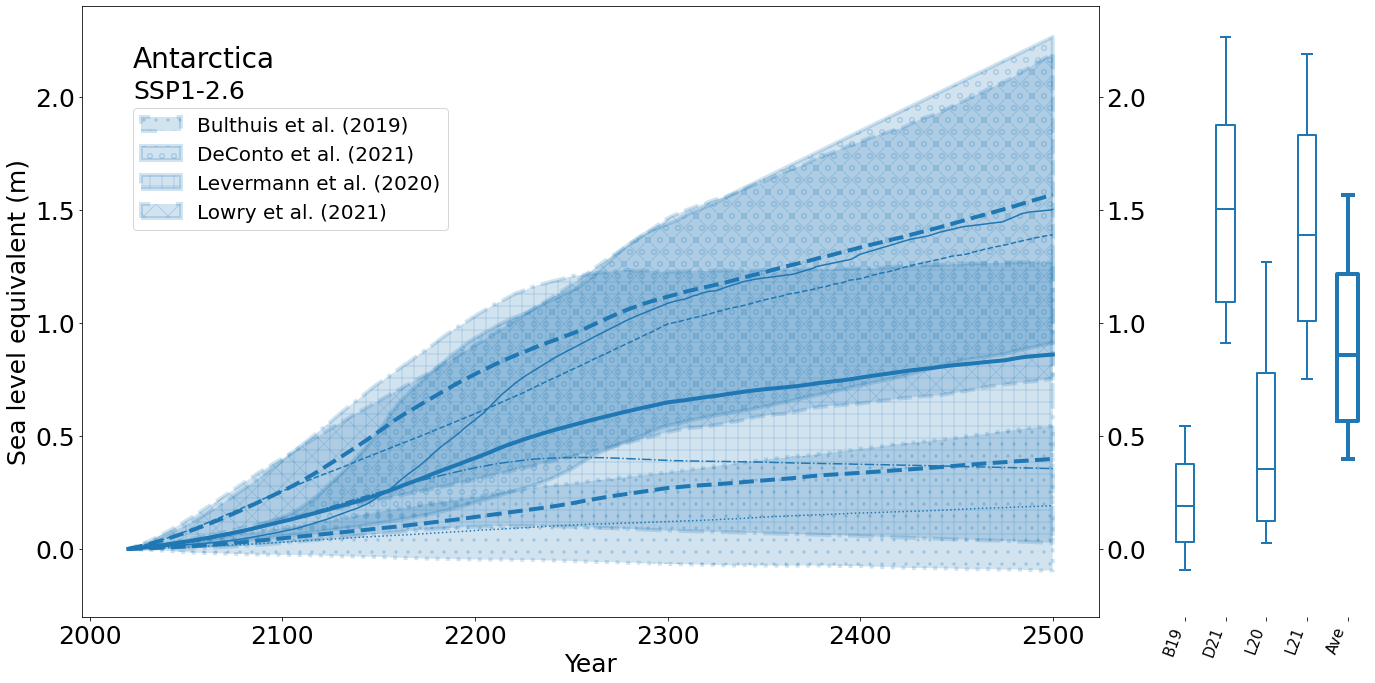

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.3, top=2.4)
ax1.plot(years, Bulthuis_26.iloc[:,q[2]], ':', c='C0')
ax1.plot(years, DeConto_26.iloc[:,q[2]], '-', c='C0')
ax1.plot(years, LARMIP_26.iloc[:,q[2]], '-.', c='C0')
ax1.plot(years, Lowry_26.iloc[:,q[2]], '--', c='C0')
ax1.plot(years, AIS_26.iloc[:,q[2]], '-', c='C0', linewidth=4)
ax1.plot(years, AIS_26.iloc[:,q[0]], '--', c='C0', linewidth=4)
ax1.plot(years, AIS_26.iloc[:,q[4]], '--', c='C0', linewidth=4)

ax1.fill_between(years, Bulthuis_26.iloc[:,q[0]], Bulthuis_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = '.', ls = ':', lw = 4, label = 'Bulthuis et al. (2019)')
ax1.fill_between(years, DeConto_26.iloc[:,q[0]],DeConto_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'DeConto et al. (2021)')
ax1.fill_between(years, LARMIP_26.iloc[:,q[0]], LARMIP_26.iloc[:,q[4]], color='C0', alpha = 0.2, hatch = '+', ls = '-.', lw = 4, label = 'Levermann et al. (2020)')
ax1.fill_between(years, Lowry_26.iloc[:,q[0]], Lowry_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '--', lw = 4, label = 'Lowry et al. (2021)')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.85), fontsize = 20)
ax1.annotate('Antarctica', xy=(0.05, 0.9), xycoords='axes fraction', size = 28)
ax1.annotate('SSP1-2.6', xy=(0.05, 0.85), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.3, top=2.4)
ax2.boxplot((Bulthuis_26.iloc[-1,q], DeConto_26.iloc[-1,q], LARMIP_26.iloc[-1,q], Lowry_26.iloc[-1,q]), whis = (0,100), 
            medianprops={"color": "C0", "linewidth": 2}, boxprops={"color": "C0", "linewidth": 2}, 
            whiskerprops={"color": "C0", "linewidth": 2}, capprops={"color": "C0", "linewidth": 2}, 
            labels = ('B19', 'D21', 'L20', 'L21'))
ax2.boxplot((AIS_26.iloc[-1,q]), positions=[5], whis = (0,100), widths=0.5,
           medianprops={"color": "C0", "linewidth": 4}, boxprops={"color": "C0", "linewidth": 4}, 
            whiskerprops={"color": "C0", "linewidth": 4}, capprops={"color": "C0", "linewidth": 4}, 
            labels = ['Ave'])
plt.yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(), fontsize=15, rotation=70, horizontalalignment='right')

f.tight_layout()
#plt.show()
#plt.savefig('./AIS_126_fullplot.png')

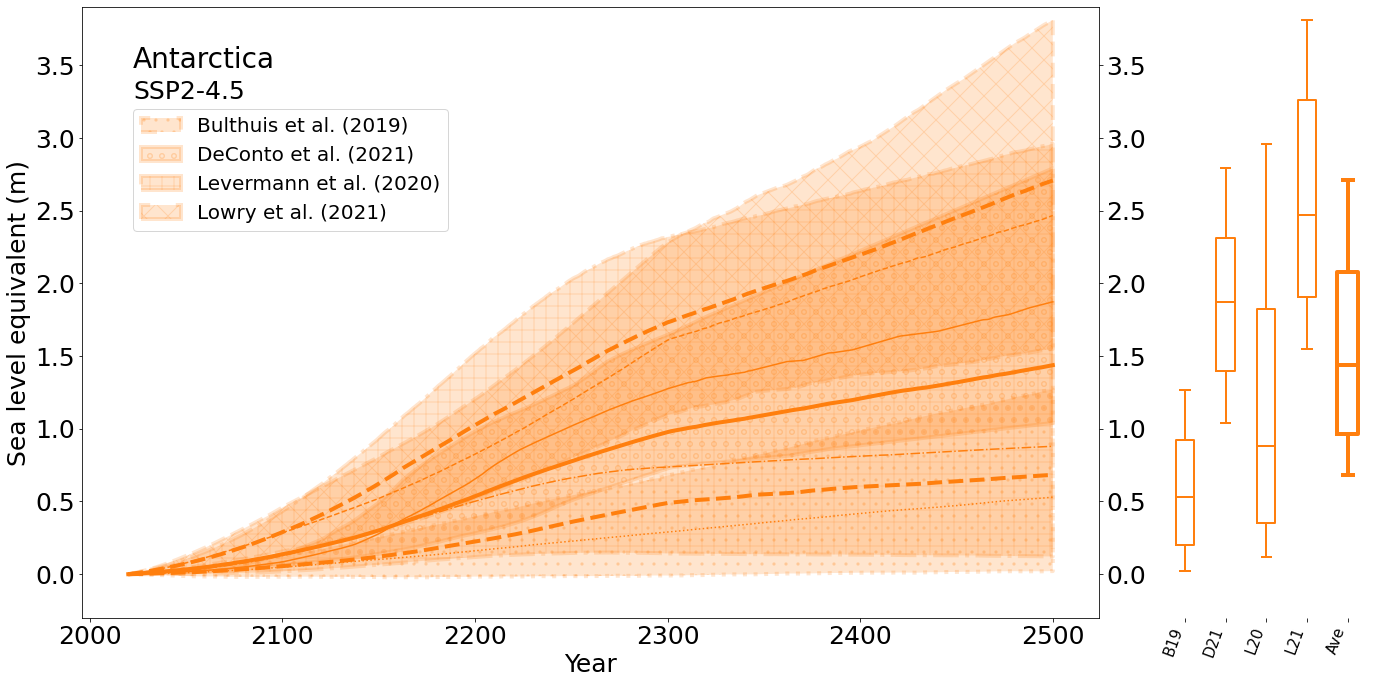

In [265]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.3, top=3.9)
ax1.plot(years, Bulthuis_45.iloc[:,q[2]], ':', c='C1')
ax1.plot(years, DeConto_45.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, LARMIP_45.iloc[:,q[2]], '-.', c='C1')
ax1.plot(years, Lowry_45.iloc[:,q[2]], '--', c='C1')
ax1.plot(years, AIS_45.iloc[:,q[2]], '-', c='C1', linewidth=4)
ax1.plot(years, AIS_45.iloc[:,q[0]], '--', c='C1', linewidth=4)
ax1.plot(years, AIS_45.iloc[:,q[4]], '--', c='C1', linewidth=4)

ax1.fill_between(years, Bulthuis_45.iloc[:,q[0]], Bulthuis_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = '.', ls = ':', lw = 4, label = 'Bulthuis et al. (2019)')
ax1.fill_between(years, DeConto_45.iloc[:,q[0]],DeConto_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'DeConto et al. (2021)')
ax1.fill_between(years, LARMIP_45.iloc[:,q[0]], LARMIP_45.iloc[:,q[4]], color='C1', alpha = 0.2, hatch = '+', ls = '-.', lw = 4, label = 'Levermann et al. (2020)')
ax1.fill_between(years, Lowry_45.iloc[:,q[0]], Lowry_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'x', ls = '--', lw = 4, label = 'Lowry et al. (2021)')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.85), fontsize = 20)
ax1.annotate('Antarctica', xy=(0.05, 0.9), xycoords='axes fraction', size = 28)
ax1.annotate('SSP2-4.5', xy=(0.05, 0.85), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.3, top=3.9)
ax2.boxplot((Bulthuis_45.iloc[-1,q], DeConto_45.iloc[-1,q], LARMIP_45.iloc[-1,q], Lowry_45.iloc[-1,q]), whis = (0,100), 
            medianprops={"color": "C1", "linewidth": 2}, boxprops={"color": "C1", "linewidth": 2}, 
            whiskerprops={"color": "C1", "linewidth": 2}, capprops={"color": "C1", "linewidth": 2}, 
            labels = ('B19', 'D21', 'L20', 'L21'))
ax2.boxplot((AIS_45.iloc[-1,q]), positions=[5], whis = (0,100), widths=0.5,
           medianprops={"color": "C1", "linewidth": 4}, boxprops={"color": "C1", "linewidth": 4}, 
            whiskerprops={"color": "C1", "linewidth": 4}, capprops={"color": "C1", "linewidth": 4}, 
            labels = ['Ave'])
plt.yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(), fontsize=15, rotation=70, horizontalalignment='right')

f.tight_layout()
#plt.show()
#plt.savefig('./AIS_245_fullplot.png')

Greenland

In [149]:
tmp = pd.read_csv('./Created_Data/Aschwanden_2500_RCP26_quantiles.csv', header = None)
Aschwanden_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Aschwanden_2500_RCP45_quantiles.csv', header = None)
Aschwanden_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/GrIS_AR6_2500_SSP126_quantiles.csv', header = None)
GrIS_AR6_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/GrIS_AR6_2500_SSP245_quantiles.csv', header = None)
GrIS_AR6_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/GrIS_2500_SSP126_quantiles.csv', header = None)
GrIS_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/GrIS_2500_SSP245_quantiles.csv', header = None)
GrIS_45 = tmp.iloc[:,1:]

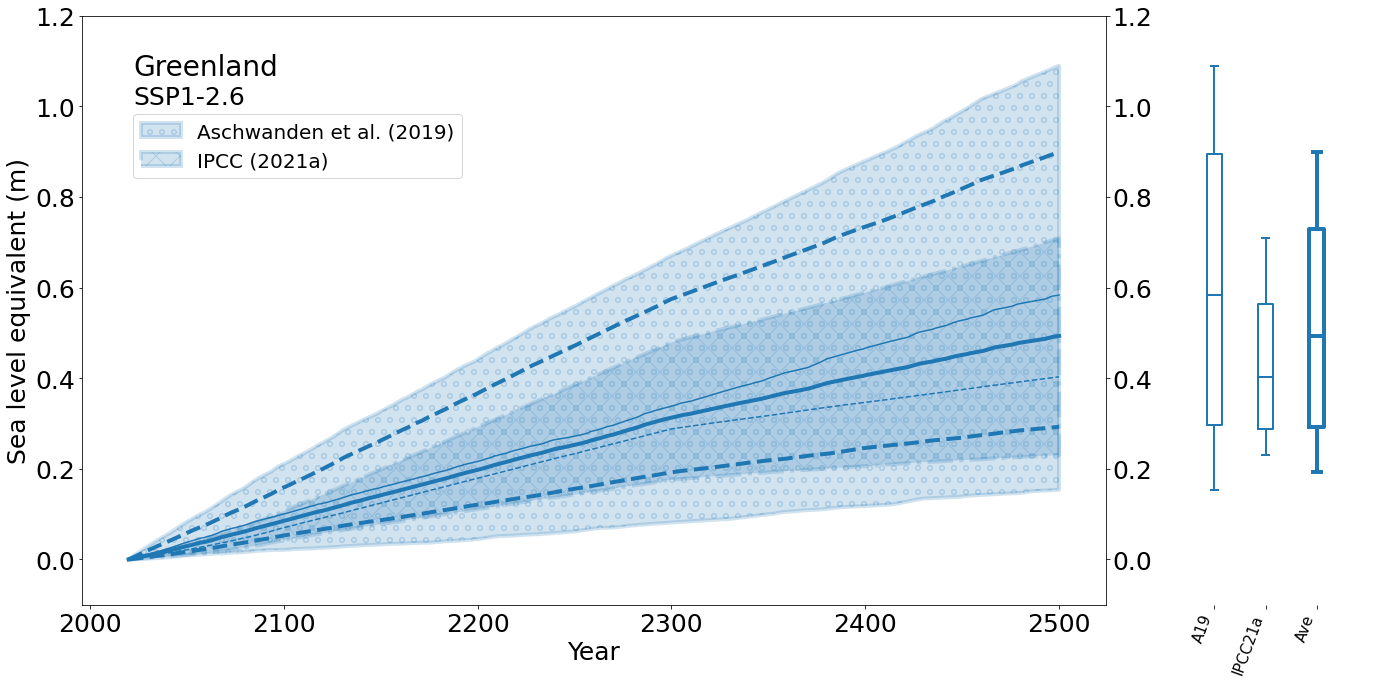

In [267]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.1, top=1.2)
ax1.plot(years, Aschwanden_26.iloc[:,q[2]], '-', c='C0')
ax1.plot(years, GrIS_AR6_26.iloc[:,q[2]], '--', c='C0')
ax1.plot(years, GrIS_26.iloc[:,q[2]], '-', c='C0', linewidth = 4)
ax1.plot(years, GrIS_26.iloc[:,q[1]], '--', c='C0', linewidth = 4)
ax1.plot(years, GrIS_26.iloc[:,q[4]], '--', c='C0', linewidth = 4)

ax1.fill_between(years, Aschwanden_26.iloc[:,q[0]], Aschwanden_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'Aschwanden et al. (2019)')
ax1.fill_between(years, GrIS_AR6_26.iloc[:,q[0]], GrIS_AR6_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '-.', lw = 4, label = 'IPCC (2021a)')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.85), fontsize = 20)
ax1.annotate('Greenland', xy=(0.05, 0.9), xycoords='axes fraction', size = 28)
ax1.annotate('SSP1-2.6', xy=(0.05, 0.85), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
ax1.tick_params(right=True, labelright=True)
#plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)


ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.1, top=1.2)
ax2.boxplot((Aschwanden_26.iloc[-1,q], GrIS_AR6_26.iloc[-1,q]), positions = [1,1.5], whis = (0,100), medianprops={"color": "C0", "linewidth": 2}, 
            boxprops={"color": "C0", "linewidth": 2}, whiskerprops={"color": "C0", "linewidth": 2}, 
            capprops={"color": "C0", "linewidth": 2}, labels = ('A19', 'IPCC21a'))
ax2.boxplot(GrIS_26.iloc[-1,q], positions = [2], whis = (0,100), medianprops={"color": "C0", "linewidth": 4}, 
            boxprops={"color": "C0", "linewidth": 4}, whiskerprops={"color": "C0", "linewidth": 4}, 
            capprops={"color": "C0", "linewidth": 4}, labels = ['Ave'])
plt.yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(), fontsize=15, rotation=70, horizontalalignment='right')
                 
f.tight_layout()
#plt.show()
#plt.savefig('./GrIS_126_fullplot.png')

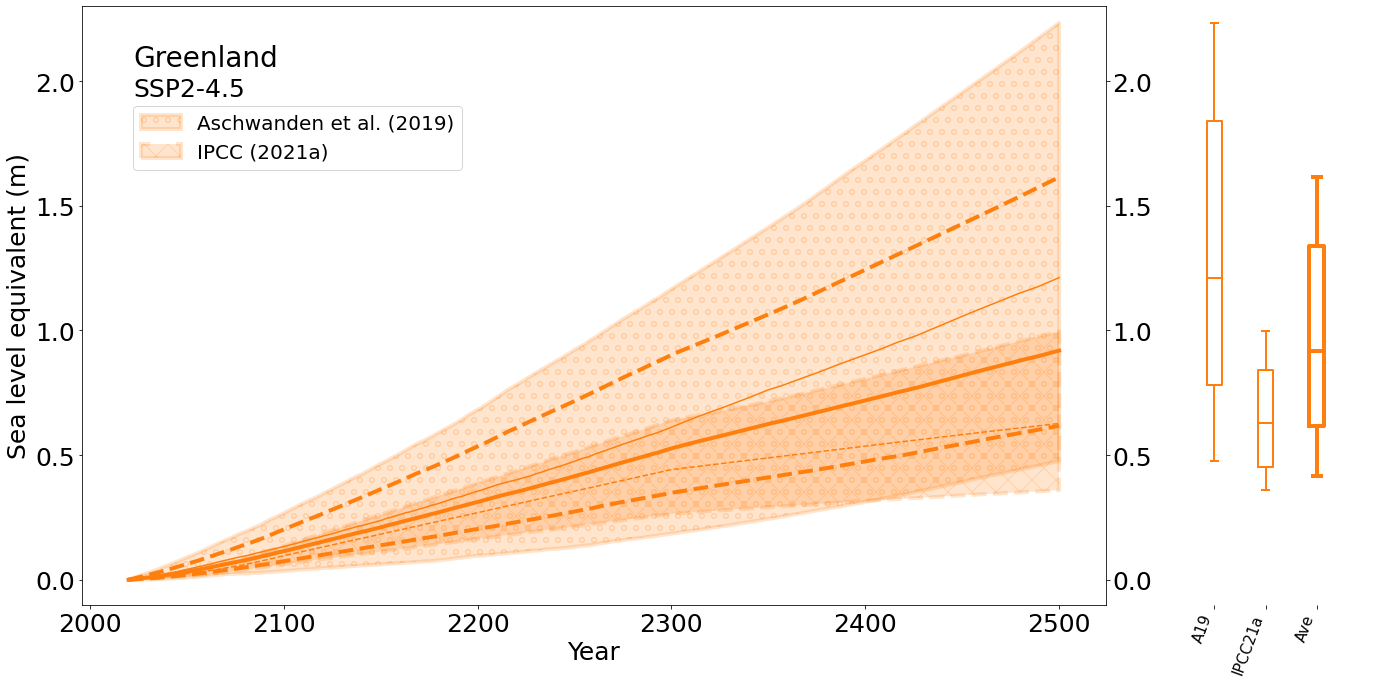

In [165]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.1, top=2.3)
ax1.plot(years, Aschwanden_45.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, GrIS_AR6_45.iloc[:,q[2]], '--', c='C1')
ax1.plot(years, GrIS_45.iloc[:,q[2]], '-', c='C1', linewidth = 4)
ax1.plot(years, GrIS_45.iloc[:,q[1]], '--', c='C1', linewidth = 4)
ax1.plot(years, GrIS_45.iloc[:,q[4]], '--', c='C1', linewidth = 4)

ax1.fill_between(years, Aschwanden_45.iloc[:,q[0]],Aschwanden_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'Aschwanden et al. (2019)')
ax1.fill_between(years, GrIS_AR6_45.iloc[:,q[0]], GrIS_AR6_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'x', ls = '--', lw = 4, label = 'IPCC (2021a)')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.85), fontsize = 20)
ax1.annotate('Greenland', xy=(0.05, 0.9), xycoords='axes fraction', size = 28)
ax1.annotate('SSP2-4.5', xy=(0.05, 0.85), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
ax1.tick_params(right=True, labelright=True)
plt.setp(ax1.get_yticklabels(), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)


ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.1, top=2.3)
ax2.boxplot((Aschwanden_45.iloc[-1,q], GrIS_AR6_45.iloc[-1,q]), positions = [1,1.5], whis = (0,100), 
            medianprops={"color": "C1", "linewidth": 2}, boxprops={"color": "C1", "linewidth": 2}, 
            whiskerprops={"color": "C1", "linewidth": 2}, capprops={"color": "C1", "linewidth": 2}, 
             labels = ('A19', 'IPCC21a'))
ax2.boxplot(GrIS_45.iloc[-1,q], positions = [2], whis = (0,100), medianprops={"color": "C1", "linewidth": 4}, 
            boxprops={"color": "C1", "linewidth": 4}, whiskerprops={"color": "C1", "linewidth": 4}, 
            capprops={"color": "C1", "linewidth": 4}, labels = ['Ave'])
plt.yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(), fontsize=15, rotation=70, horizontalalignment='right')

f.tight_layout()
#plt.show()
#plt.savefig('./GrIS_245_fullplot.png')

Glaciers

In [9]:
tmp = pd.read_csv('./Created_Data/Glaciers_2500_SSP126_quantiles.csv', header = None)
glac_126 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Glaciers_2500_SSP245_quantiles.csv', header = None)
glac_245 = tmp.iloc[:,1:]

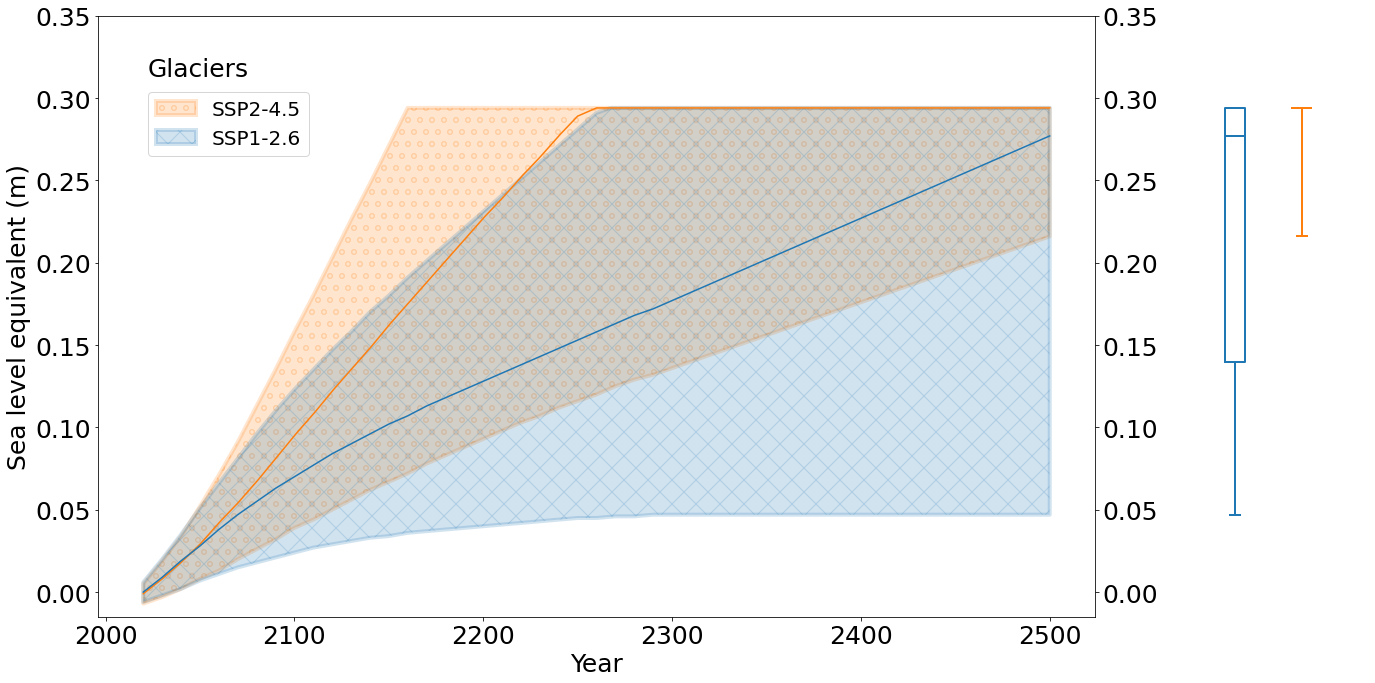

In [166]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.015, top=0.35)
ax1.plot(years, glac_245.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, glac_126.iloc[:,q[2]], '-', c='C0')

ax1.fill_between(years, glac_245.iloc[:,q[0]], glac_245.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'SSP2-4.5')
ax1.fill_between(years, glac_126.iloc[:,q[0]], glac_126.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '-', lw = 4, label = 'SSP1-2.6')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.89), fontsize = 20)
ax1.annotate('Glaciers', xy=(0.05, 0.9), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
ax1.tick_params(right=True, labelright=True)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.015, top=0.35)

ax2.boxplot(glac_126.iloc[-1,q], positions=[1], whis = (0,100),
            boxprops=dict(color='C0', linewidth='2'),
            capprops=dict(color='C0', linewidth='2'),
            whiskerprops=dict(color='C0', linewidth='2'),
            medianprops=dict(color='C0', linewidth='2'),
            )

box1 = plt.boxplot(glac_245.iloc[-1,q], positions=[1.5], whis = (0,100))
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='C1', linewidth = 2)

plt.yticks([])
plt.xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(),fontsize=15, rotation=30, horizontalalignment='right')



f.tight_layout()
#plt.show()
#plt.savefig('./Glaciers_fullplot.png')

Find likely range [17,83]% of year where glaciers hits cap under SSP1-2.6 and SSP2-4.5

In [271]:
[glac_126.iloc[indx,0] for indx in range(len(glac_126)) if glac_126.iloc[indx,q[3]] == 0.294][0]

2325.0

In [273]:
[glac_126.iloc[indx,0] for indx in range(len(glac_126)) if glac_126.iloc[indx,q[1]] == 0.294]

[]

In [270]:
[glac_245.iloc[indx,0] for indx in range(len(glac_245)) if glac_245.iloc[indx,q[3]] == 0.294][0]

2190.0

In [156]:
[glac_245.iloc[indx,0] for indx in range(len(glac_245)) if glac_245.iloc[indx,q[1]] == 0.294][0]

2439.0

THE

In [275]:
tmp = pd.read_csv('./Created_Data/THE_2500_RCP26_quantiles.csv', header = None)
the_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/THE_2500_RCP45_quantiles.csv', header = None)
the_45 = tmp.iloc[:,1:]

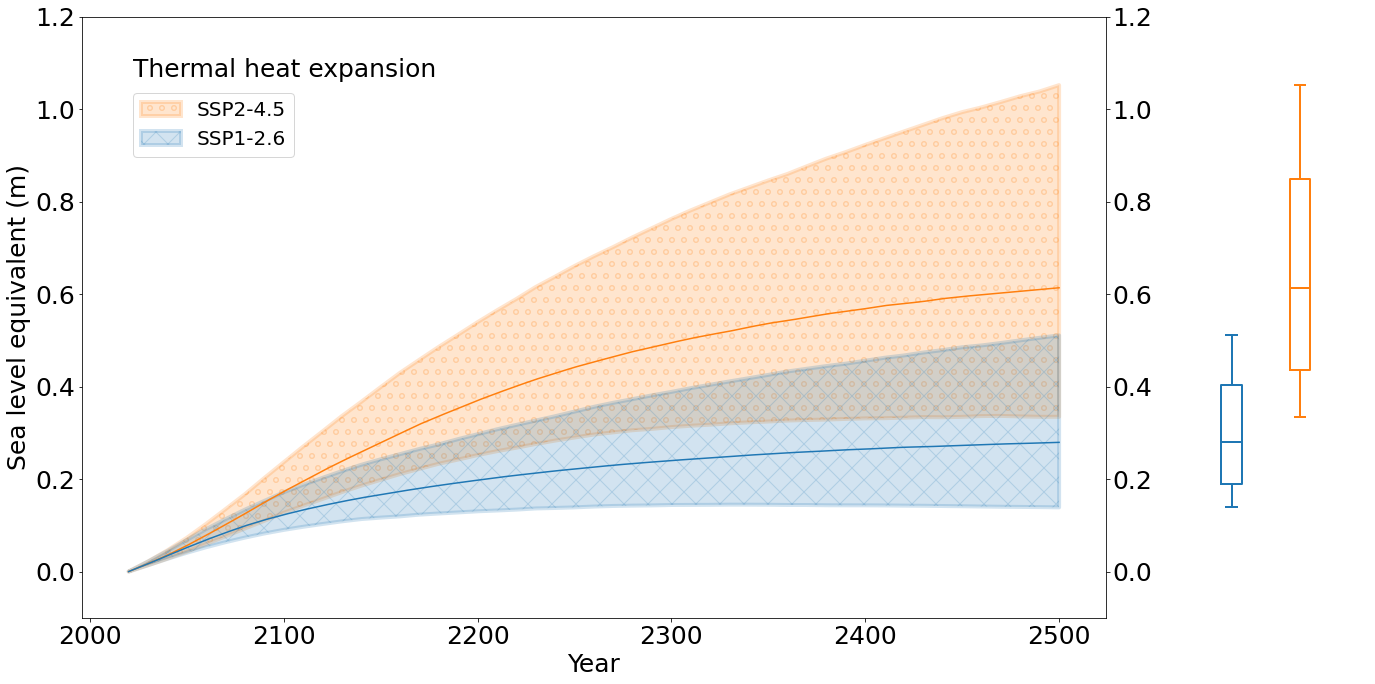

In [277]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.1, top=1.2)
ax1.plot(years, the_45.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, the_26.iloc[:,q[2]], '-', c='C0')

ax1.fill_between(years, the_45.iloc[:,q[0]], the_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'SSP2-4.5')
ax1.fill_between(years, the_26.iloc[:,q[0]], the_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '-', lw = 4, label = 'SSP1-2.6')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.89), fontsize = 20)
ax1.annotate('Thermal heat expansion', xy=(0.05, 0.9), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.1, top=1.2)

ax2.boxplot(the_26.iloc[-1,q], positions=[1], whis = (0,100),
            boxprops=dict(color='C0', linewidth='2'),
            capprops=dict(color='C0', linewidth='2'),
            whiskerprops=dict(color='C0', linewidth='2'),
            medianprops=dict(color='C0', linewidth='2'),
            )


box1 = plt.boxplot(the_45.iloc[-1,q], positions=[1.5], whis = (0,100))
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='C1', linewidth = 2)

plt.yticks([])
plt.xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(),fontsize=15, rotation=30, horizontalalignment='right')



f.tight_layout()
#plt.show()
#plt.savefig('./THE_fullplot.png')

LWS

In [158]:
tmp = pd.read_csv('./Created_Data/LWS_2500_RCP26_quantiles.csv', header = None)
lws_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/LWS_2500_RCP45_quantiles.csv', header = None)
lws_45 = tmp.iloc[:,1:]

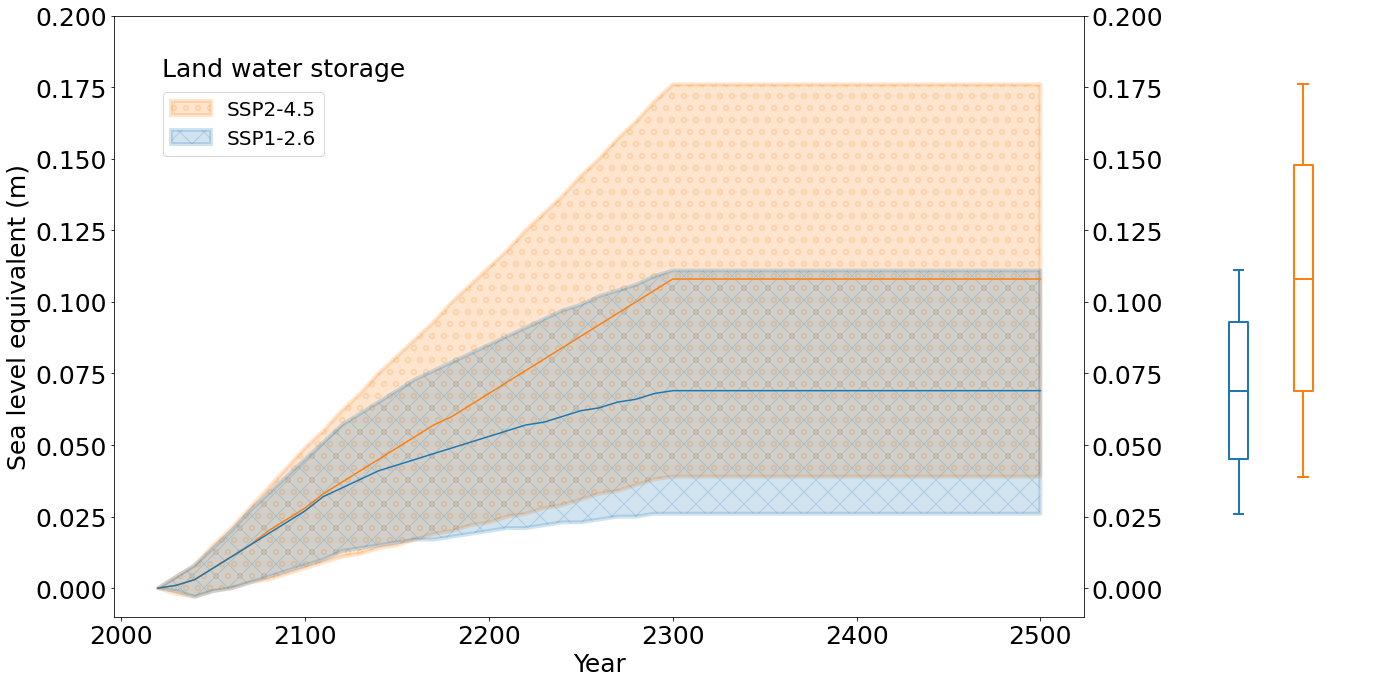

In [168]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.01, top=0.2)
ax1.plot(years, lws_45.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, lws_26.iloc[:,q[2]], '-', c='C0')

ax1.fill_between(years, lws_45.iloc[:,q[0]], lws_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'SSP2-4.5')
ax1.fill_between(years, lws_26.iloc[:,q[0]], lws_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '-', lw = 4, label = 'SSP1-2.6')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.89), fontsize = 20)
ax1.annotate('Land water storage', xy=(0.05, 0.9), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.01, top=0.2)

ax2.boxplot(lws_26.iloc[-1,q], positions=[1], whis = (0,100),
            boxprops=dict(color='C0', linewidth='2'),
            capprops=dict(color='C0', linewidth='2'),
            whiskerprops=dict(color='C0', linewidth='2'),
            medianprops=dict(color='C0', linewidth='2'),
            )


box1 = plt.boxplot(lws_45.iloc[-1,q], positions=[1.5], whis = (0,100))
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='C1', linewidth = 2)

plt.yticks([])
plt.xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(),fontsize=15, rotation=30, horizontalalignment='right')



f.tight_layout()
#plt.show()
#plt.savefig('./LWS_fullplot.png')

GMSL

In [278]:
tmp = pd.read_csv('./Created_Data/GMSL_2500_RCP26_quantiles.csv', header = None)
gmsl_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/GMSL_2500_RCP45_quantiles.csv', header = None)
gmsl_45 = tmp.iloc[:,1:]

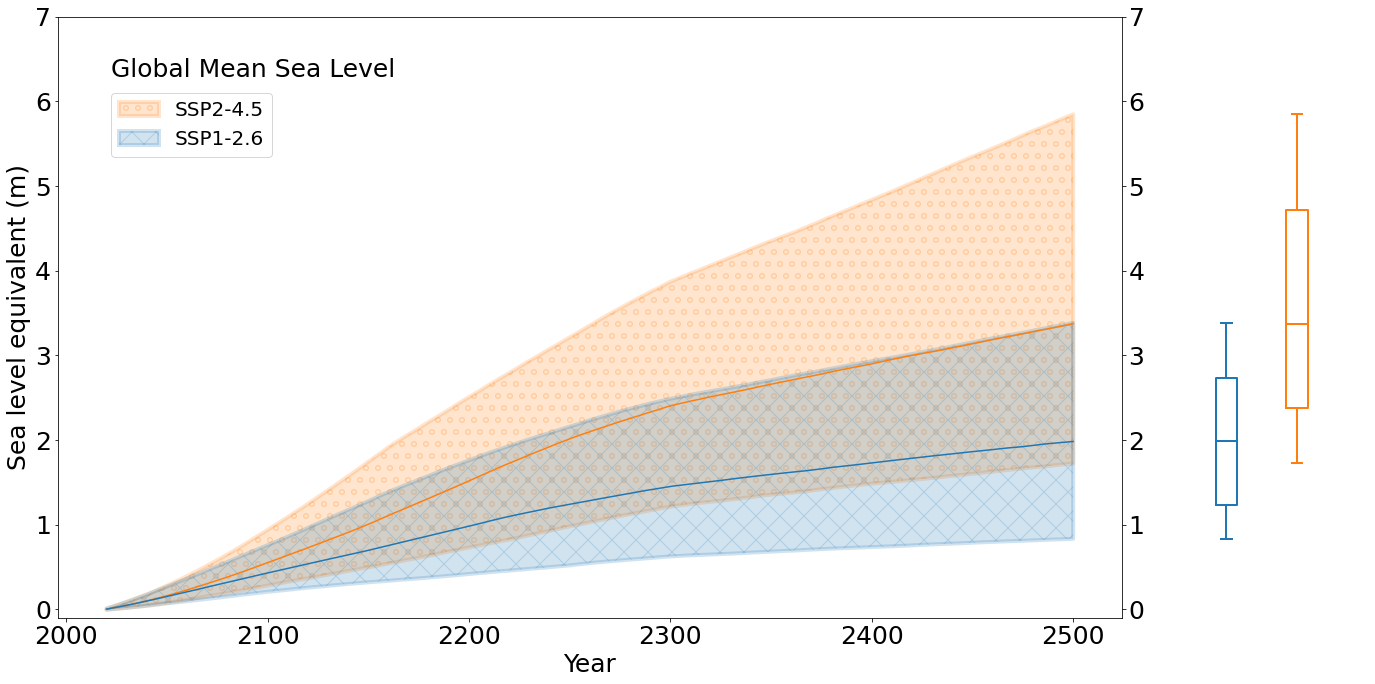

In [295]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.1, top=7)
ax1.plot(years, gmsl_45.iloc[:,q[2]], '-', c='C1')
ax1.plot(years, gmsl_26.iloc[:,q[2]], '-', c='C0')

ax1.fill_between(years, gmsl_45.iloc[:,q[0]], gmsl_45.iloc[:,q[4]], color='C1', alpha=0.2, hatch = 'o', ls = '-', lw = 4, label = 'SSP2-4.5')
ax1.fill_between(years, gmsl_26.iloc[:,q[0]], gmsl_26.iloc[:,q[4]], color='C0', alpha=0.2, hatch = 'x', ls = '-', lw = 4, label = 'SSP1-2.6')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.89), fontsize = 20)
ax1.annotate('Global Mean Sea Level', xy=(0.05, 0.9), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.1, top=7)
ax2.boxplot(gmsl_26.iloc[-1,q], positions=[1], whis = (0,100),
            boxprops=dict(color='C0', linewidth='2'),
            capprops=dict(color='C0', linewidth='2'),
            whiskerprops=dict(color='C0', linewidth='2'),
            medianprops=dict(color='C0', linewidth='2'),
            )


box1 = plt.boxplot(gmsl_45.iloc[-1,q], positions=[1.5], whis = (0,100))
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='C1', linewidth = 2)

plt.yticks([])
plt.xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(),fontsize=15, rotation=30, horizontalalignment='right')


f.tight_layout()
#plt.show()
#plt.savefig('./GMSL_fullplot.png')